# PUBLIC RELATIONS

# Importing libraries and datasets

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import os

print(os.listdir('/content/drive/My Drive/Colab Notebooks/Data Science for Business/Data Science for Business Package/5. Public Relations Department/'))


['amazon-alexa.tsv', 'amazon-alexa.gsheet']


In [166]:
file_path = '/content/drive/My Drive/Colab Notebooks/Data Science for Business/Data Science for Business Package/5. Public Relations Department/amazon-alexa.tsv'
print(os.listdir(os.path.dirname(file_path)))

reviews_df = pd.read_csv(file_path, sep='\t')
print(reviews_df.head())

['amazon-alexa.tsv', 'amazon-alexa.gsheet']
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [167]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [168]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [169]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [170]:
reviews_df['verified_reviews']

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
5,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do."
6,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response. She does not seem to be very smartbon politics yet."
7,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
8,looks great
9,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!"


#Exploring the dataset

<Axes: >

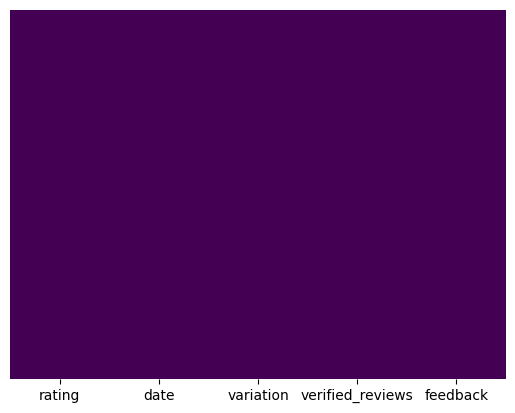

In [171]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

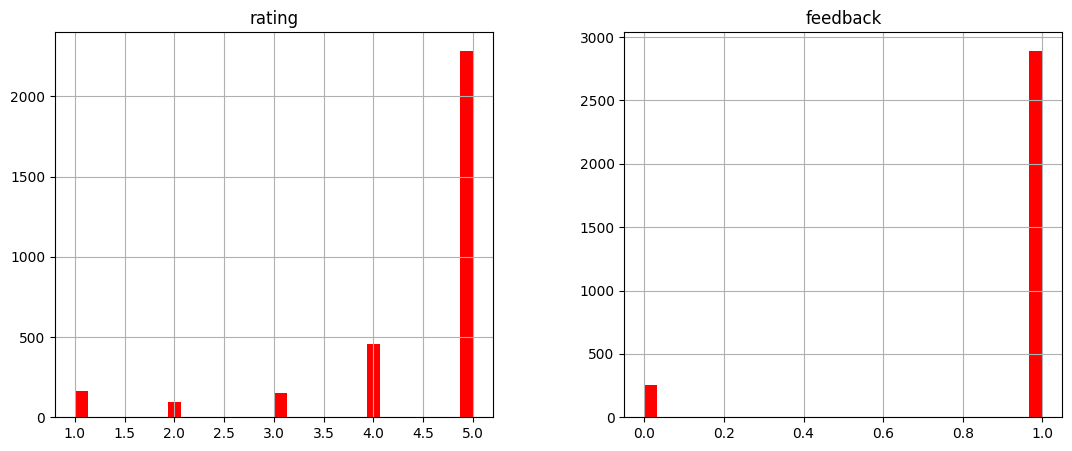

In [172]:
reviews_df.hist(bins =30, figsize = (13,5), color = 'r')

In [173]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('')
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

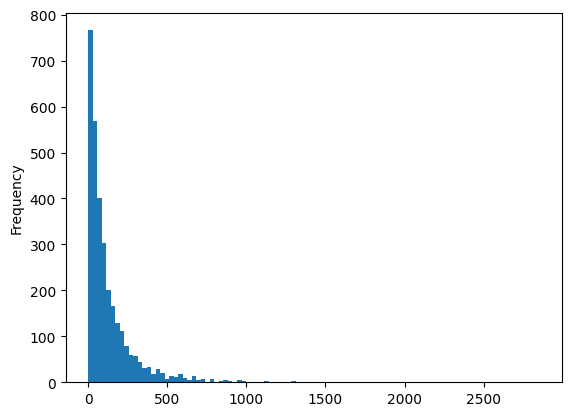

In [174]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [175]:
mean_length = reviews_df['length'].mean()
min_length = reviews_df['length'].min()
max_length = reviews_df['length'].max()

min_length_idx = reviews_df['length'].idxmin()
max_length_idx = reviews_df['length'].idxmax()

mean_length_idx = (reviews_df['length'] - mean_length).abs().idxmin()

print("Row with minimum length:")
print(reviews_df.loc[min_length_idx])

print("\nRow with maximum length:")
print(reviews_df.loc[max_length_idx])

print("\nRow closest to mean length:")
print(reviews_df.loc[mean_length_idx])


Row with minimum length:
rating                      2
date                29-Jun-18
variation               White
verified_reviews             
feedback                    0
length                      0
Name: 473, dtype: object

Row with maximum length:
rating                                                              5
date                                                        20-Jul-18
variation                                                 Black  Plus
verified_reviews    Incredible piece of technology.I have this rig...
feedback                                                            1
length                                                           2851
Name: 2016, dtype: object

Row closest to mean length:
rating                                                              4
date                                                        11-Jun-18
variation                                                       Black
verified_reviews    Nice. It works good.Some times is not e

In [176]:
reviews_df.length.describe()

,length
count,3150.000000
mean,132.048254
std,182.100859
min,0.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


In [177]:
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [178]:
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


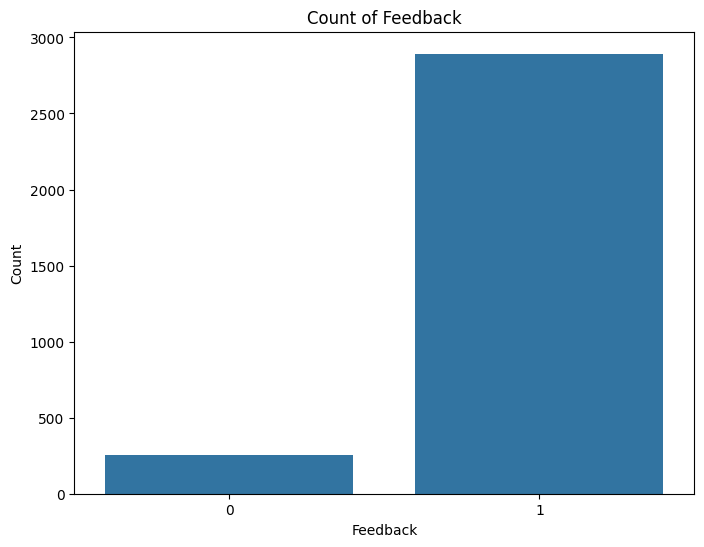

In [179]:
plt.figure(figsize=(8, 6))
sns.countplot(x='feedback', data=reviews_df)
plt.title('Count of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

<ipython-input-180-fb2668a98d15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'rating', data = reviews_df, palette = 'hls')


<Axes: xlabel='rating', ylabel='count'>

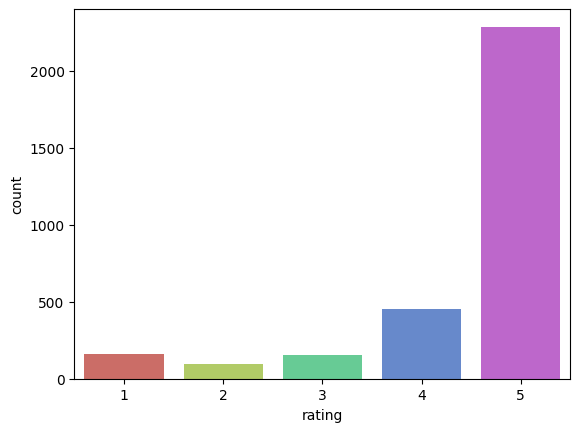

In [180]:
sns.countplot(x = 'rating', data = reviews_df, palette = 'hls')

<Axes: xlabel='variation', ylabel='rating'>

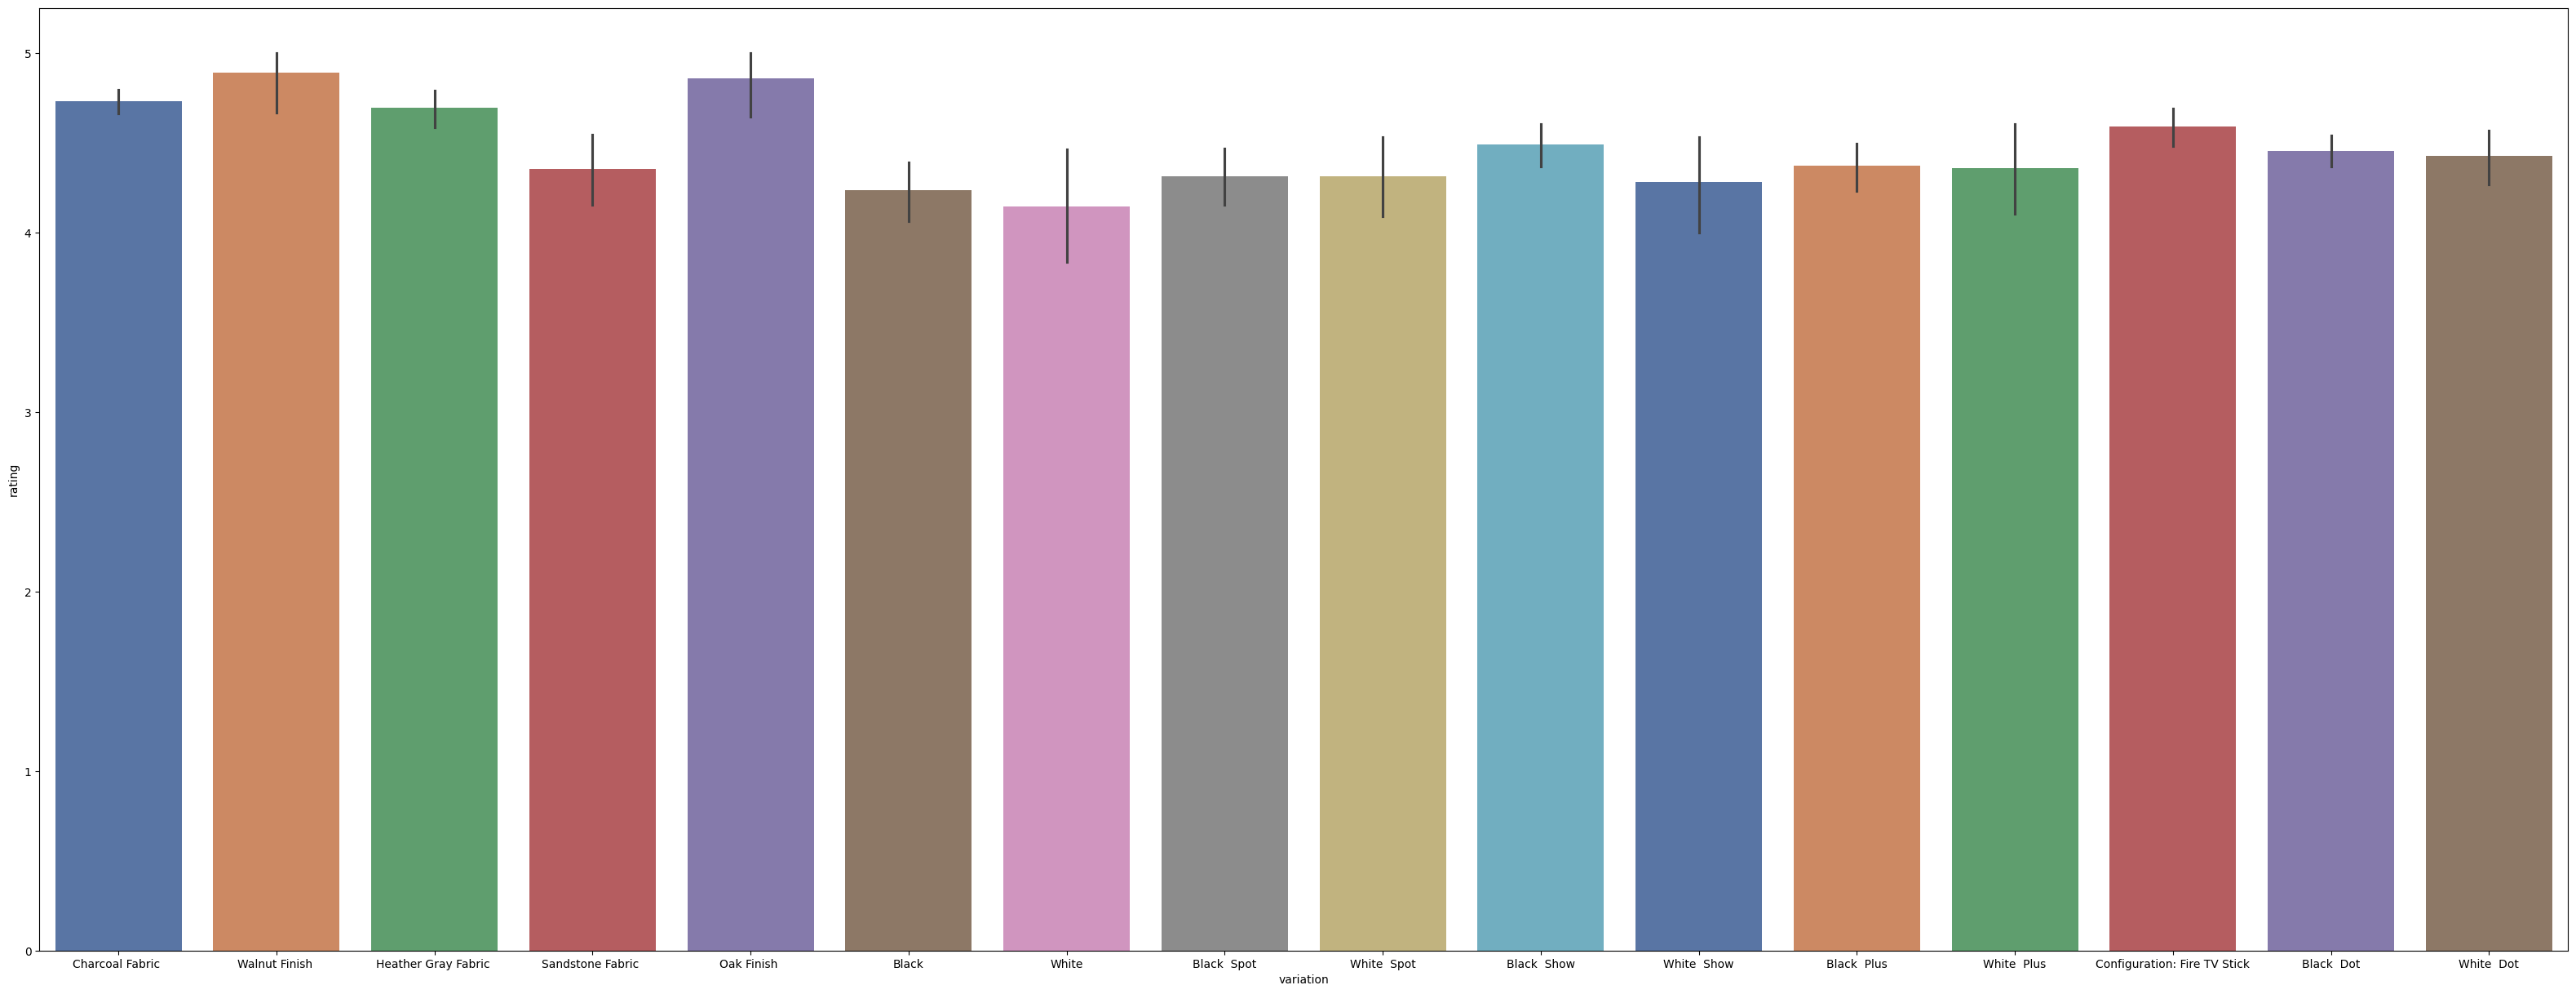

In [181]:
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, hue = 'variation', palette = 'deep')

In [182]:
sentences = reviews_df['verified_reviews'].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [183]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

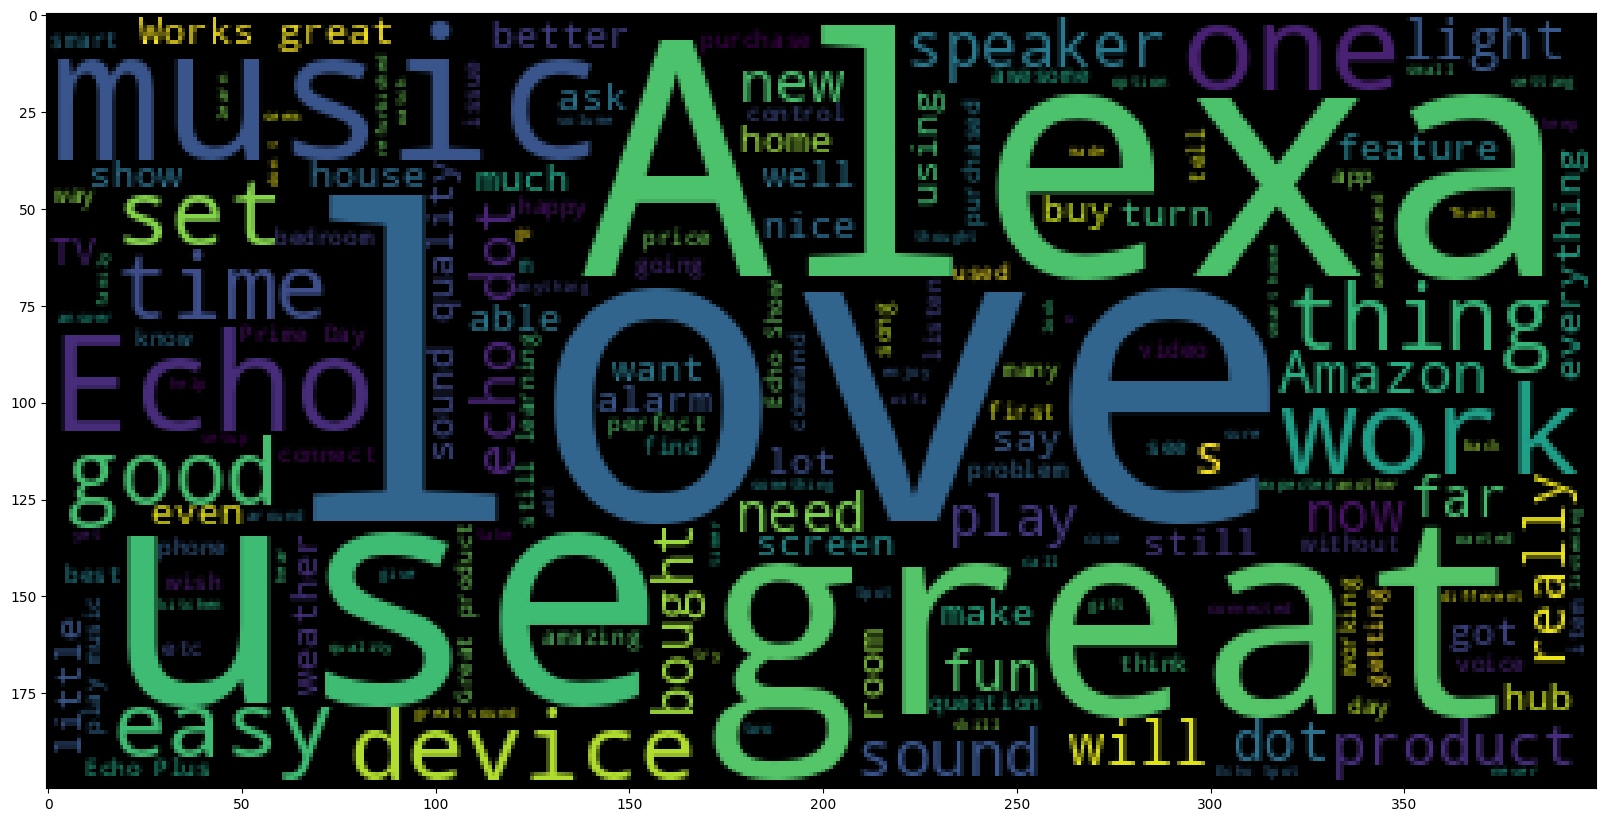

In [184]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


In [185]:
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [186]:
negative_as_one_string = " ".join(negative_list)
negative_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

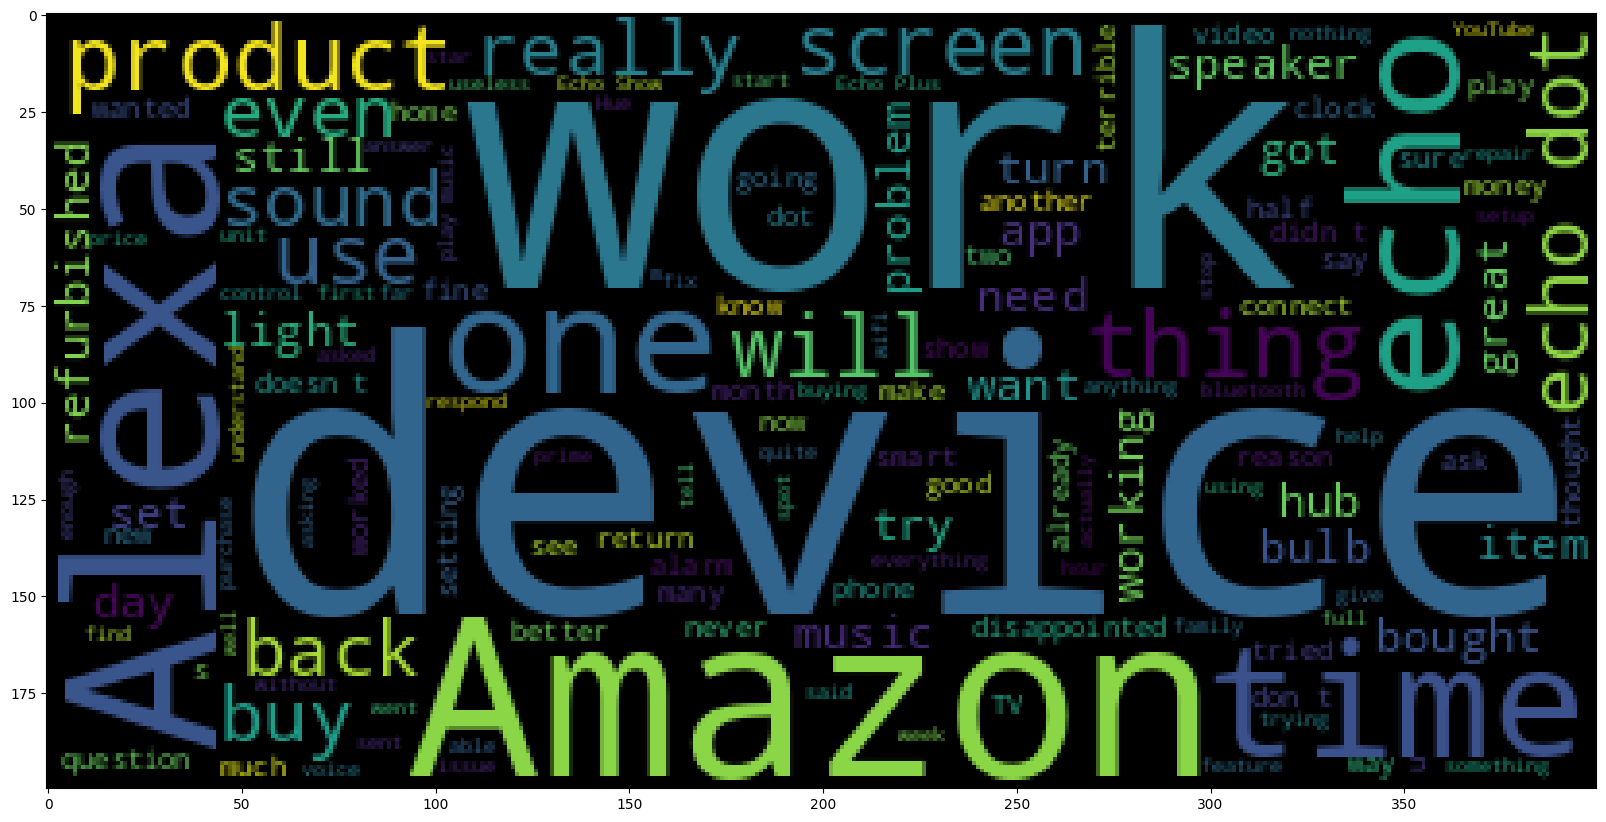

In [187]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_as_one_string))

#Data cleaning

In [188]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [189]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [190]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)

In [191]:
variation_dummies = variation_dummies.replace({True: 1, False: 0})
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [192]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)

In [193]:
reviews_df

,variation,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Charcoal Fabric,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Charcoal Fabric,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Charcoal Fabric,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,Black Dot,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,Black Dot,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [194]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [196]:
def message_cleaning(message):
  test_punc_removed = [char for char in message if char not in string.punctuation]
  test_punc_removed_join = ''.join(test_punc_removed)
  test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return test_punc_removed_join_clean


In [197]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)
reviews_df_clean

,verified_reviews
0,"[Love, Echo]"
1,[Loved]
2,"[Sometimes, playing, game, answer, question, correctly, Alexa, says, got, wrong, answers, like, able, turn, lights, away, home]"
3,"[lot, fun, thing, 4, yr, old, learns, dinosaurs, control, lights, play, games, like, categories, nice, sound, playing, music, well]"
4,[Music]
5,"[received, echo, gift, needed, another, Bluetooth, something, play, music, easily, accessible, found, smart, speaker, Can’t, wait, see, else]"
6,"[Without, cellphone, cannot, use, many, features, iPad, see, use, great, alarm, u, r, almost, deaf, hear, alarm, bedroom, living, room, reason, enough, keep, herIt, fun, ask, random, questions, hear, response, seem, smartbon, politics, yet]"
7,"[think, 5th, one, Ive, purchased, Im, working, getting, one, every, room, house, really, like, features, offer, specifily, playing, music, Echos, controlling, lights, throughout, house]"
8,"[looks, great]"
9,"[Love, I’ve, listened, songs, haven’t, heard, since, childhood, get, news, weather, information, It’s, great]"


In [198]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [199]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


#Tokenization

In [200]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [201]:
reviews_countvectorizer.shape

(3150, 5211)

In [202]:
reviews_df

,variation,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Charcoal Fabric,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Charcoal Fabric,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Charcoal Fabric,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,Black Dot,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,Black Dot,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [203]:
reviews_df.drop('verified_reviews', axis = 1, inplace = True)

In [204]:
reviews_df

,variation,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Charcoal Fabric,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Charcoal Fabric,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Walnut Finish,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Charcoal Fabric,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Charcoal Fabric,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Black Dot,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,Black Dot,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,Black Dot,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,White Dot,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [205]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)
reviews_df

,variation,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,Charcoal Fabric,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charcoal Fabric,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Walnut Finish,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Charcoal Fabric,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charcoal Fabric,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Black Dot,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,Black Dot,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,Black Dot,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,White Dot,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X = reviews_df.drop(['feedback'], axis = 1)

In [208]:
y = reviews_df['feedback']

#Naive Bayes Classifier Model

In [241]:
X.shape

(3150, 5227)

In [242]:
y.shape

(3150,)

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [245]:
X_train.dtypes


,0
variation,object
Black Dot,int64
Black Plus,int64
Black Show,int64
Black Spot,int64
Charcoal Fabric,int64
Configuration: Fire TV Stick,int64
Heather Gray Fabric,int64
Oak Finish,int64
Sandstone Fabric,int64


In [247]:
y_train.dtypes

dtype('int64')

In [249]:
data_types = X_train.dtypes
non_int64_columns = data_types[data_types != 'int64'].index

if len(non_int64_columns) > 0:
    print("Columns not of type int64:")
    print(non_int64_columns)
else:
    print("All columns are of type int64.")

Columns not of type int64:
Index(['variation'], dtype='object')


In [250]:
non_numeric_columns = X_train.applymap(lambda x: not isinstance(x, (int, float))).any(axis=0)

columns_to_remove = non_numeric_columns[non_numeric_columns].index

X_train_cleaned = X_train.drop(columns=columns_to_remove)

print("Columns removed:", columns_to_remove)

<ipython-input-250-8079fe32f639>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = X_train.applymap(lambda x: not isinstance(x, (int, float))).any(axis=0)


Columns removed: Index(['variation'], dtype='object')


In [254]:
X_train_cleaned.shape

(2520, 5226)

In [255]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_cleaned, y_train)

MultinomialNB()

In [257]:
from sklearn.metrics import classification_report, confusion_matrix

In [259]:
y_predict_train = classifier.predict(X_train_cleaned)
y_predict_train

array([1, 1, 1, ..., 1, 1, 1])

<Axes: >

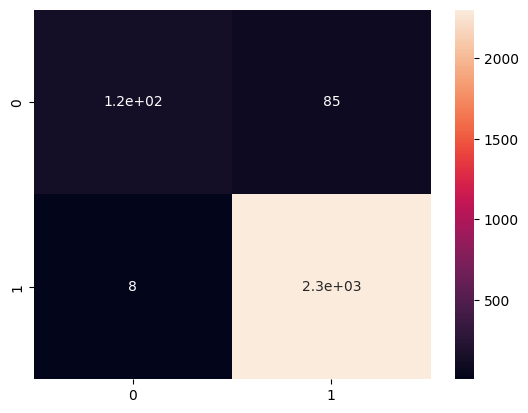

In [260]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [265]:
non_numeric_columns = X_test.applymap(lambda x: not isinstance(x, (int, float))).any(axis=0)

columns_to_remove = non_numeric_columns[non_numeric_columns].index

X_test_cleaned = X_test.drop(columns=columns_to_remove)

print("Columns removed:", columns_to_remove)

<ipython-input-265-4bd567224134>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = X_test.applymap(lambda x: not isinstance(x, (int, float))).any(axis=0)


Columns removed: Index(['variation'], dtype='object')


<Axes: >

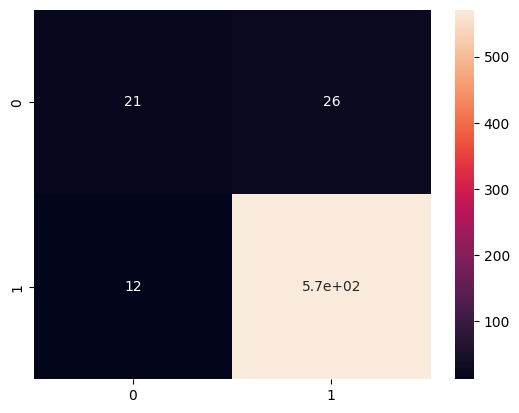

In [266]:
y_predict_test = classifier.predict(X_test_cleaned)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [267]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.45      0.52        47
           1       0.96      0.98      0.97       583

    accuracy                           0.94       630
   macro avg       0.80      0.71      0.75       630
weighted avg       0.93      0.94      0.93       630



#Logistic Regression Classifier

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [269]:
model = LogisticRegression()
model.fit(X_train_cleaned, y_train)

LogisticRegression()

In [270]:
y_pred = model.predict(X_test_cleaned)

In [271]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [274]:
print('Accuracy = {}%'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy = 96.03174603174604%


<Axes: >

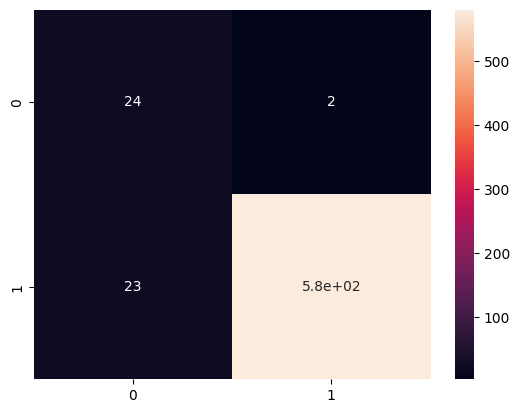

In [275]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66        47
           1       0.96      1.00      0.98       583

    accuracy                           0.96       630
   macro avg       0.94      0.75      0.82       630
weighted avg       0.96      0.96      0.95       630

